In [1]:
# optimizer_compare_mnist.py
import os
import sys
sys.path.append("..\\deep_learning_from_scratch")  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

In [2]:
# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128 #배치 크기가 128로 설정되면, 매번 훈련 데이터를 128개의 샘플로 나눠서 처리하게 됩니다. 
max_iterations = 2000 # 128*2000= 256000

In [3]:
# 1. 실험용 설정==========
optimizers = {} #최적화 기법
optimizers['SGD'] = SGD()   #확률적 경사 하강법 : 급격히 변할 수 있음
optimizers['Momentum'] = Momentum() #모멘텀 기법 : 관성
optimizers['AdaGrad'] = AdaGrad()   #매개변수 별로 학습률 조정, adaptive gradient
optimizers['Adam'] = Adam() #adam = + Momentum + adaGrad
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []  

In [4]:
# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

===========iteration:0===========
SGD:2.3426662504683757
Momentum:2.32069586431975
AdaGrad:1.9324304752757184
Adam:2.2086562306177746
===========iteration:100===========
SGD:1.4369117918412704
Momentum:0.37647431608963955
AdaGrad:0.20703361418505073
Adam:0.2983468681286783
===========iteration:200===========
SGD:0.7080422734792233
Momentum:0.26676557647829335
AdaGrad:0.07573586731353513
Adam:0.19105167147015545
===========iteration:300===========
SGD:0.5235135849829058
Momentum:0.1867308303827983
AdaGrad:0.07729271208955851
Adam:0.12831905784934805
===========iteration:400===========
SGD:0.423143279137874
Momentum:0.13536505689758438
AdaGrad:0.06597144977581247
Adam:0.0885722198474462
===========iteration:500===========
SGD:0.38838968950677155
Momentum:0.15784628354131738
AdaGrad:0.04432619681179699
Adam:0.11685869228927565
===========iteration:600===========
SGD:0.3813791881494166
Momentum:0.1459036314106684
AdaGrad:0.07412487361851686
Adam:0.0825766298480787
===========iteration:700=

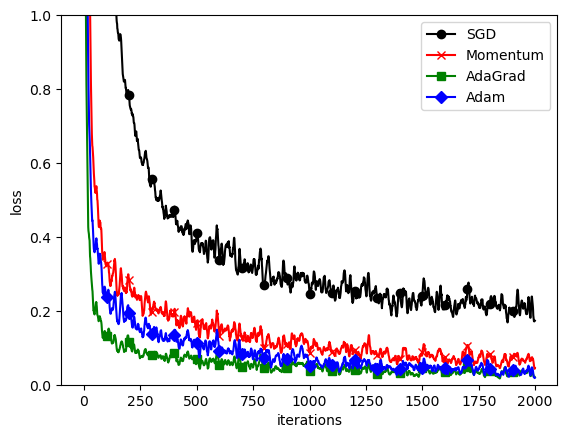

In [5]:
# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
colors = {"SGD": "k", "Momentum": "r", "AdaGrad": "g", "Adam": "b"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], color=colors[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()